In [1]:
# The code was removed by Watson Studio for sharing.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Importing libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,jaccard_similarity_score
from sklearn.metrics import log_loss,f1_score,roc_curve,auc

## Data Cleaning and Preprocessing

In [3]:
df = df_data_0.copy()
print(df.shape)
df.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [5]:
df = df.dropna()
print(df.shape)
df.head()

(480, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [6]:
df_selected_features = df.copy()
df_selected_features = df_selected_features.drop(columns=['Loan_ID','Married'],axis=1)
df_selected_features.head()

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [7]:
df_selected_features.columns.values

array(['Gender', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'], dtype=object)

In [8]:
df_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 11 columns):
Gender               480 non-null object
Dependents           480 non-null object
Education            480 non-null object
Self_Employed        480 non-null object
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null float64
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null float64
Property_Area        480 non-null object
Loan_Status          480 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 45.0+ KB


In [9]:
objects = ['Gender','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

for feature in objects: 
    counts = df_selected_features[feature].value_counts()
    print(counts,'\n')

Male      394
Female     86
Name: Gender, dtype: int64 

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64 

Graduate        383
Not Graduate     97
Name: Education, dtype: int64 

No     414
Yes     66
Name: Self_Employed, dtype: int64 

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64 

Y    332
N    148
Name: Loan_Status, dtype: int64 



In [10]:
df_with_dummies = df_selected_features.copy()
df_with_dummies['Gender'] = df_with_dummies['Gender'].map({'Male':1,'Female':2})
df_with_dummies['Education'] = df_with_dummies['Education'].map({'Graduate':1,'Not Graduate':2})
df_with_dummies['Self_Employed'] = df_with_dummies['Self_Employed'].map({'Yes':1,'No':0})
df_with_dummies['Loan_Status'] = df_with_dummies['Loan_Status'].map({'Y':1,'N':0})
df_with_dummies['Property_Area'] = df_with_dummies['Property_Area'].map({'Urban':1,'Semiurban':2,'Rural':3})
df_with_dummies['Dependents'] = df_with_dummies['Dependents'].map({'3+':3,'1':1,'2':2,'0':0})
df_with_dummies.head()

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,3,0
2,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,0,2,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [11]:
df_with_dummies.describe()

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,1.179167,0.777083,1.202083,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.977083,0.691667
std,0.383892,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,1.000000,0.000000,1.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,2.000000,1.000000
75%,1.000000,2.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,3.000000,1.000000
max,2.000000,3.000000,2.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,3.000000,1.000000


### Feature Scaling

In [12]:
x = df_with_dummies[['Gender', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']].values
y = y = df_with_dummies['Loan_Status']

In [13]:
x = StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.46719815,  0.21859918, -0.50325312, -0.3992747 , -0.13796959,
        -0.02795204, -0.20808917,  0.27554157,  0.41319694,  1.31886834],
       [-0.46719815, -0.76203265, -0.50325312,  2.50454133, -0.4175358 ,
        -0.604633  , -0.97900085,  0.27554157,  0.41319694, -1.25977445],
       [-0.46719815, -0.76203265,  1.98707162, -0.3992747 , -0.49118022,
         0.29710022, -0.30756164,  0.27554157,  0.41319694, -1.25977445],
       [-0.46719815, -0.76203265, -0.50325312, -0.3992747 ,  0.11228014,
        -0.604633  , -0.04644639,  0.27554157,  0.41319694, -1.25977445],
       [-0.46719815,  1.19923101, -0.50325312,  2.50454133,  0.00931924,
         0.99997795,  1.52024509,  0.27554157,  0.41319694, -1.25977445]])

### Train and Test Sets

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(384, 10) (96, 10)
(384,) (96,)


## K-Nearest Neighbor

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
#MODEL 
k = 7
neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [17]:
y_knn = neigh.predict(x_test)
y_knn[0:5]

array([1, 1, 0, 1, 1])

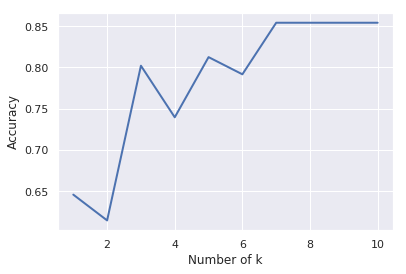

In [18]:
knn = 11

number_of_k = []
accuracy_total = []

for k in range(1,knn):
    number_of_k.append(k)
    model = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
    predicted = model.predict(x_test)
    accuracy_total.append(accuracy_score(y_test,predicted))

plt.plot(number_of_k,accuracy_total,linewidth=2.0)
plt.xlabel('Number of k')
plt.ylabel("Accuracy")
plt.show()

In [19]:
print("According to the accuracy score above, the best number of k in this model is 7")

According to the accuracy score above, the best number of k in this model is 7


In [20]:
print(classification_report(y_test,y_knn))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72        30
           1       0.84      0.97      0.90        66

   micro avg       0.85      0.85      0.85        96
   macro avg       0.87      0.78      0.81        96
weighted avg       0.86      0.85      0.84        96



In [21]:
print("The accuracy score for K-Nearest Neighbor algorithm is",accuracy_score(y_test,y_knn).round(4))
print("The F1-score for K-Nearest Neighbor algorithm is",f1_score(y_test,y_knn).round(4))

The accuracy score for K-Nearest Neighbor algorithm is 0.8542
The F1-score for K-Nearest Neighbor algorithm is 0.9014


## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dt = 2 
drugTree = DecisionTreeClassifier(criterion = 'entropy',max_depth = dt)
drugTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
predTree = drugTree.fit(x_train,y_train).predict(x_test)
print(predTree[0:5])
print(y_test[0:5])

[1 1 0 1 1]
15     1
602    1
78     0
415    1
472    1
Name: Loan_Status, dtype: int64


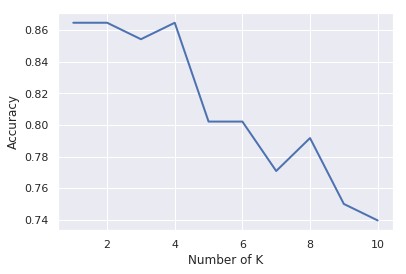

In [25]:
max_k = 11 
total_accuracy = []
k3 = []

for k in range(1,max_k):
    k3.append(k)
    model = DecisionTreeClassifier(criterion='entropy',max_depth=k).fit(x_train,y_train)
    prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test,prediction)
    total_accuracy.append(accuracy)

plt.plot(k3,total_accuracy,linewidth = 2.0)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.show()

In [26]:
print("The best number of K is 2")

The best number of K is 2


In [27]:
print(classification_report(y_test,predTree))

              precision    recall  f1-score   support

           0       0.90      0.63      0.75        30
           1       0.85      0.97      0.91        66

   micro avg       0.86      0.86      0.86        96
   macro avg       0.88      0.80      0.83        96
weighted avg       0.87      0.86      0.86        96



In [28]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predTree)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("The AUC (Area Under Curve) is",roc_auc.round(4))

print("The accuracy score for Decision Tree algorithm is",accuracy_score(y_test,predTree).round(4))
print("The F1-score for Decision Tree algorithm is",f1_score(y_test,predTree).round(4))

The AUC (Area Under Curve) is 0.8015
The accuracy score for Decision Tree algorithm is 0.8646
The F1-score for Decision Tree algorithm is 0.9078


## Support Vector Machine (SVM)

In [29]:
from sklearn import svm

model = svm.SVC(kernel='rbf')
model.fit(x_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
yhat_svm = model.predict(x_test)
yhat_svm[0:5]

array([1, 1, 0, 1, 1])

In [31]:
print(classification_report(y_test,yhat_svm))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.84      0.95      0.89        66

   micro avg       0.84      0.84      0.84        96
   macro avg       0.85      0.78      0.80        96
weighted avg       0.85      0.84      0.83        96



In [32]:
print("The accuracy score for SVM algorithm is",accuracy_score(y_test,yhat_svm).round(4))
print("The F1-score for SVM algorithm is",f1_score(y_test,yhat_svm).round(4))
print("The Jaccard Index for SVM algorithm is",jaccard_similarity_score(y_test,yhat_svm).round(4))

The accuracy score for SVM algorithm is 0.8438
The F1-score for SVM algorithm is 0.8936
The Jaccard Index for SVM algorithm is 0.8438


## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
yhat_lr = LR.predict(x_test)
yhat_lr[0:5]

array([1, 1, 0, 1, 1])

In [36]:
print(classification_report(y_test,yhat_lr))

              precision    recall  f1-score   support

           0       0.90      0.63      0.75        30
           1       0.85      0.97      0.91        66

   micro avg       0.86      0.86      0.86        96
   macro avg       0.88      0.80      0.83        96
weighted avg       0.87      0.86      0.86        96



In [37]:
print("The accuracy score for Logistic Regression algorithm is",accuracy_score(y_test,yhat_lr).round(4))
print("The F1-score for Logistic Regression algorithm is",f1_score(y_test,yhat_lr).round(4))
print("The Jaccard Index for Logistic Regression algorithm is",jaccard_similarity_score(y_test,yhat_lr).round(4))
print("The Log Loss for Logistic Regression algorithm is",log_loss(y_test,LR.predict_proba(x_test)).round(4))

The accuracy score for Logistic Regression algorithm is 0.8646
The F1-score for Logistic Regression algorithm is 0.9078
The Jaccard Index for Logistic Regression algorithm is 0.8646
The Log Loss for Logistic Regression algorithm is 0.523
